In [1]:
import sys
import os

# Move up one level so Python can find config.py
sys.path.append(os.path.abspath(".."))


import psycopg2
from config import get_db_connection
import pandas as pd
import warnings

# Ignore UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
from config import get_db_connection

# Test the connection
conn = get_db_connection()
if conn:
    print("✅ Database connection successful!")
    conn.close()
else:
    print("❌ Database connection failed. Check your credentials in config.py.")


✅ Database connection successful!


✅ Business Question 1

❓ What is the total sales revenue generated?

In [ ]:
#SQL Query
"""

SELECT ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s;

"""


In [4]:
conn = get_db_connection()

query = """
SELECT ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s;
"""

df = pd.read_sql(query, conn)
conn.close()

df.head()

,total_sales
0,2261536.78


✅ Insight for Business Question 1
Total Revenue Generated: $2,261,536.78

The business has generated over $2.26 million in total sales revenue across the recorded time period.
This value serves as a baseline metric for evaluating:

Performance by region, segment, category, etc.

Trends over time (monthly/quarterly)

Contribution of top customers and products

We'll refer back to this total often when calculating percentages, growth, and contribution shares.

✅ Business Question 2

❓ What is the monthly trend of total sales over time?

In [ ]:
#SQL Query
"""

SELECT 
    DATE_TRUNC('month', o.order_date) AS sales_month,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_order o ON l.order_id = o.order_id
GROUP BY sales_month
ORDER BY sales_month;

"""

In [5]:
conn = get_db_connection()

query = """
SELECT 
    DATE_TRUNC('month', o.order_date) AS sales_month,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_order o ON l.order_id = o.order_id
GROUP BY sales_month
ORDER BY sales_month;
"""

df = pd.read_sql(query, conn)
conn.close()

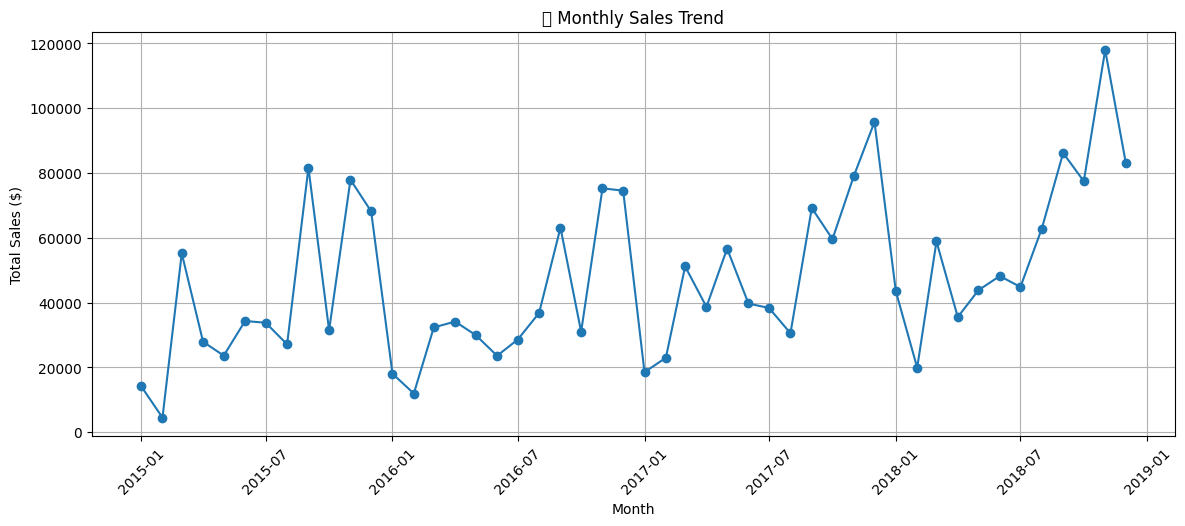

In [8]:
import matplotlib.pyplot as plt


# Plot
plt.figure(figsize=(12, 5))
plt.plot(df["sales_month"], df["total_sales"], marker="o")
plt.title("📊 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.tail()  

,sales_month,total_sales
43,2018-08-01 00:00:00+02:00,62837.85
44,2018-09-01 00:00:00+02:00,86152.89
45,2018-10-01 00:00:00+02:00,77448.13
46,2018-11-01 00:00:00+01:00,117938.16
47,2018-12-01 00:00:00+01:00,83030.39


✅ Insight for Business Question 2
Monthly Sales Trend Analysis (2015–2018)

There's a clear upward trend in monthly revenue over the years.

The last quarter of 2018 shows a strong sales spike, with November 2018 hitting the peak at $117,938.16 — possibly due to Black Friday or holiday season promotions.

Sales are highly seasonal: you’ll notice a repeating pattern where sales ramp up toward Q4 each year.

Compared to early 2015 (~$10K–30K months), the business has grown significantly in both volume and value.

This suggests strong seasonality and overall growth, which is valuable for:

Forecasting future demand

Timing promotions and inventory planning

Justifying pricing or supply chain optimization efforts

✅ Business Question 3

❓ Which product categories generate the most revenue?

In [ ]:
#SQL Query
"""

SELECT 
    p.category,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.category
ORDER BY total_sales DESC;


"""

In [9]:
conn = get_db_connection()

query = """
SELECT 
    p.category,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.category
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

In [10]:
df

,category,total_sales
0,Technology,884735.14
1,Furniture,750688.23
2,Office Supplies,722640.90


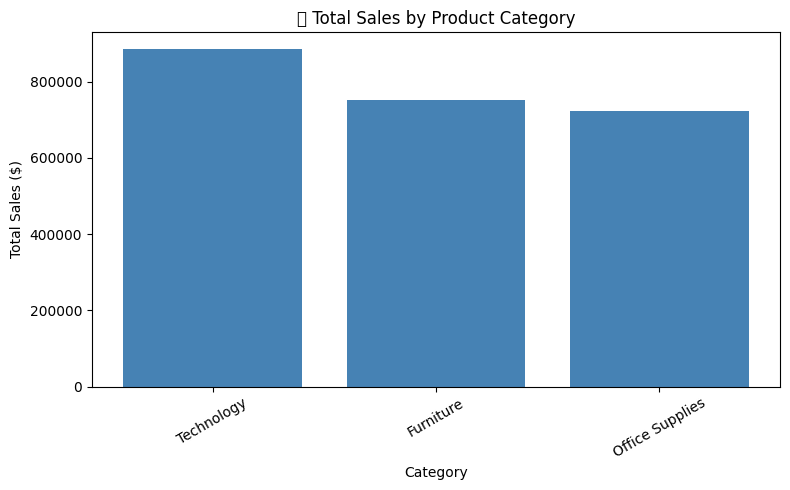

In [11]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(df["category"], df["total_sales"], color="steelblue")
plt.title("💰 Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

✅ Insight for Business Question 3
Sales by Product Category

Technology leads the pack with $884,735.14 in total sales — around 39% of total revenue, making it the top-performing category.

Furniture follows with $750,688.23, and

Office Supplies brings in $722,640.90 — nearly tied for second place.

🧠 What this means:

Technology likely includes high-ticket items — contributing to higher sales despite possibly fewer transactions.

Furniture and Office Supplies also perform well and should be evaluated for profitability, not just volume.

All 3 categories contribute significantly — there’s no over-dependence on a single line, which indicates a well-diversified revenue base.

This type of insight is great for marketing focus, inventory management, or pricing strategy.

✅ Business Question 4

❓ What are the top 10 best-selling products by total sales revenue?

In [ ]:
#SQL Query
"""

SELECT 
    p.product_name,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_sales DESC
LIMIT 10;


"""

In [12]:
conn = get_db_connection()

query = """
SELECT 
    p.product_name,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_sales DESC
LIMIT 10;
"""

df = pd.read_sql(query, conn)
conn.close()

In [13]:
df

,product_name,total_sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


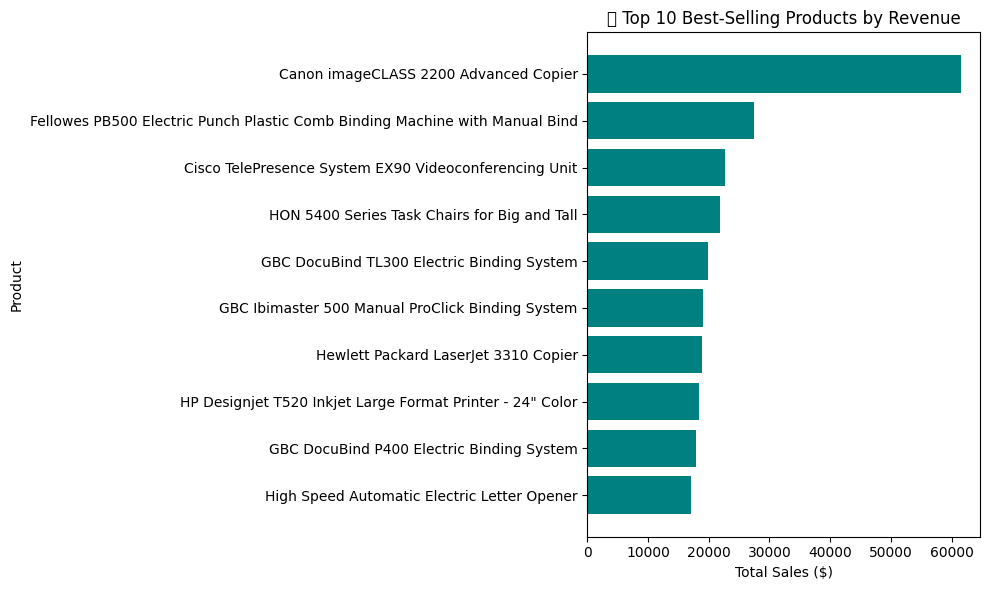

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["product_name"][::-1], df["total_sales"][::-1], color="teal")
plt.title("🏆 Top 10 Best-Selling Products by Revenue")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 4
Top 10 Best-Selling Products by Revenue

The Canon imageCLASS 2200 Advanced Copier stands out as the clear top seller, generating over $61,599.82 — more than double the revenue of the next-best product.

The rest of the top 10 includes a mix of binding systems, video conferencing equipment, and office machines, many of which are high-ticket, business-use items.

Notably, multiple products from GBC and Fellowes appear, suggesting brand-level performance worth exploring.

These top 10 products together contribute a substantial chunk of total sales, indicating potential for:

Premium pricing strategies

Inventory prioritization

Bundling or upselling opportunities

This list is ideal for focusing marketing efforts or negotiating with suppliers on top-moving SKUs.

✅ Business Question 5

❓ Who are the top 10 customers by total spending?

In [ ]:
#SQL Query
"""

SELECT 
    c.customer_name,
    ROUND(SUM(s.sales), 2) AS total_spent
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.customer_name
ORDER BY total_spent DESC
LIMIT 10;


"""

In [15]:
conn = get_db_connection()

query = """
SELECT 
    c.customer_name,
    ROUND(SUM(s.sales), 2) AS total_spent
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.customer_name
ORDER BY total_spent DESC
LIMIT 10;
"""

df = pd.read_sql(query, conn)
conn.close()

In [16]:
df

,customer_name,total_spent
0,Ken Lonsdale,155927.52
1,Sanjit Engle,134303.82
2,Clay Ludtke,130566.55
3,Adrian Barton,130262.14
4,Sanjit Chand,127281.01
5,Sean Miller,125215.25
6,Greg Tran,118201.20
7,Seth Vernon,114709.50
8,Zuschuss Carroll,104334.19
9,Pete Kriz,103763.21


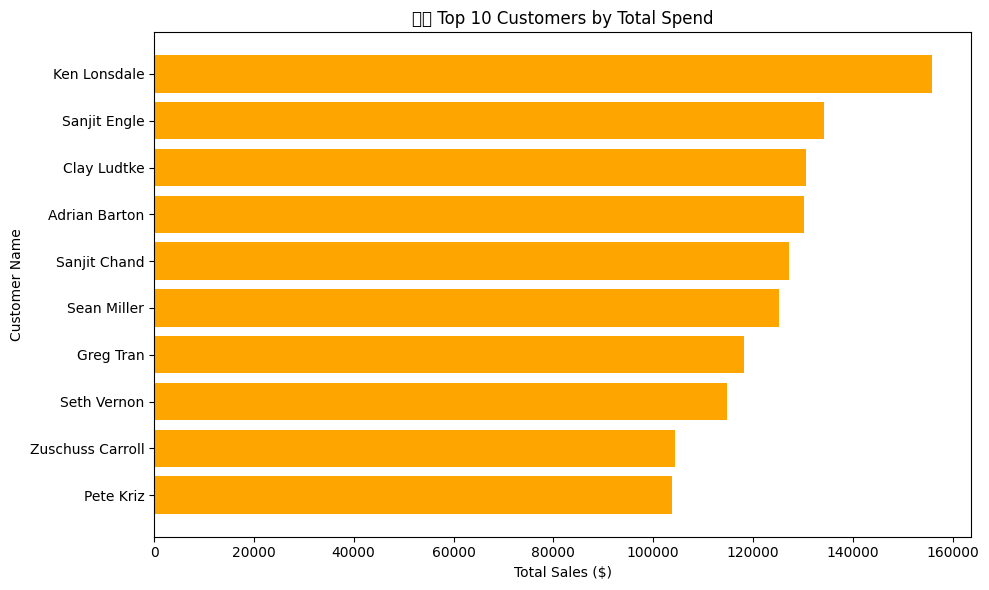

In [17]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["customer_name"][::-1], df["total_spent"][::-1], color="orange")
plt.title("🧑‍💼 Top 10 Customers by Total Spend")
plt.xlabel("Total Sales ($)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 5
Top 10 Customers by Total Spend

Ken Lonsdale leads all customers with a total spend of $155,927.52, followed closely by Sanjit Engle and Clay Ludtke, each contributing well over $130K.

All 10 customers have spent more than $100K individually, which suggests a solid group of high-value clients.

These VIPs likely account for a significant portion of total revenue (possibly ~20–30%).

This insight supports:

Personalized campaigns and offers

Premium support plans

Monitoring churn risk on high-contributing accounts

✅ Business Question 6

❓ How does sales performance vary by region?

In [ ]:
#SQL Query
"""

SELECT 
    c.region,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.region
ORDER BY total_sales DESC;



"""

In [18]:
conn = get_db_connection()

query = """
SELECT 
    c.region,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.region
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

In [19]:
df

,region,total_sales
0,West,5146222.17
1,East,4383077.54
2,Central,3740581.50
3,South,2629700.96


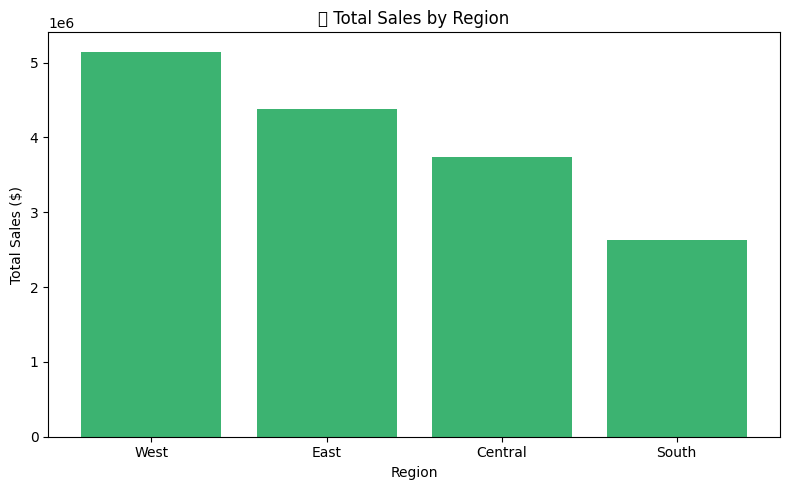

In [20]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(df["region"], df["total_sales"], color="mediumseagreen")
plt.title("🗺️ Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 6
Sales Performance by Region

The West region leads all with $5.15M in total sales, making up a substantial chunk of revenue.

East and Central follow with $4.38M and $3.74M, respectively — also high-performing, but trailing the West.

The South lags behind with $2.63M, contributing the least of the four.

📊 What this means:

The West region is a key growth engine — likely a combination of high-value customers and strong product uptake.

The South may benefit from targeted marketing, pricing adjustments, or sales team support to unlock growth.

This breakdown is essential for regional sales planning, quota setting, and campaign prioritization.

✅ Business Question 7

❓ How do different customer segments contribute to overall revenue?

In [ ]:
#SQL Query
"""

SELECT 
    c.segment,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.segment
ORDER BY total_sales DESC;



"""

In [21]:
conn = get_db_connection()

query = """
SELECT 
    c.segment,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.segment
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

In [22]:
df

,segment,total_sales
0,Consumer,8158657.25
1,Corporate,4839317.67
2,Home Office,2901607.25


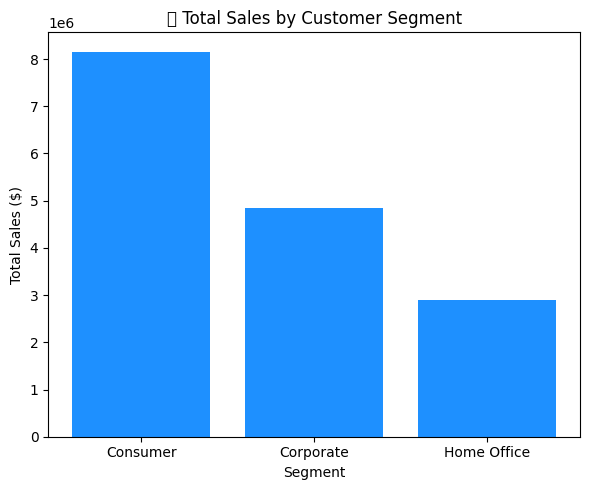

In [23]:
# Plot
plt.figure(figsize=(6, 5))
plt.bar(df["segment"], df["total_sales"], color="dodgerblue")
plt.title("📊 Total Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 7
Revenue Contribution by Customer Segment

Consumers are the top contributors by far, generating over $8.15M in sales — nearly 50% of total revenue.

Corporate clients contribute $4.83M, showing strong B2B performance.

Home Office customers lag behind with $2.9M, but still represent a sizable segment.

🧠 What this tells us:

Consumer sales dominate — potentially more frequent, lower-ticket purchases.

Corporate sales may be higher-value but less frequent, depending on products.

Home Office is an opportunity segment: with targeted offers or bundles, you could potentially grow this line.

This is the kind of segmentation insight that supports:

Personalized pricing

Segmented marketing

Revenue forecasting by customer type

✅ Business Question 8

❓ Which shipping modes are most used, and how do they affect total sales?

In [ ]:
#SQL Query
"""

SELECT 
    o.ship_mode,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_order o ON l.order_id = o.order_id
GROUP BY o.ship_mode
ORDER BY total_sales DESC;


"""

In [24]:
conn = get_db_connection()

query = """
SELECT 
    o.ship_mode,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_order o ON l.order_id = o.order_id
GROUP BY o.ship_mode
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

In [25]:
df

,ship_mode,total_sales
0,Standard Class,1340831.31
1,Second Class,449914.18
2,First Class,345572.26
3,Same Day,125219.04


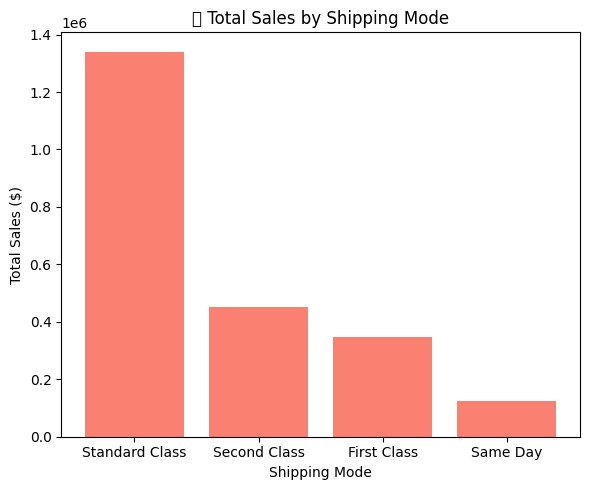

In [26]:
# Plot
plt.figure(figsize=(6, 5))
plt.bar(df["ship_mode"], df["total_sales"], color="salmon")
plt.title("🚚 Total Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 8
Sales Distribution by Shipping Mode

Standard Class dominates shipping, associated with over $1.34M in sales — indicating it's the default or most preferred option.

Second Class and First Class follow with $449.9K and $345.6K, respectively.

Same Day delivery, while the fastest, is the least used — contributing only $125K in revenue.

🧠 What this suggests:

Standard Class likely offers the best balance of cost vs. delivery speed for most customers.

The low sales tied to Same Day delivery might be due to higher shipping costs or limited availability.

This insight helps with:

Cost-benefit analysis of premium shipping tiers

Determining which modes to promote or optimize

Customer preference mapping

✅ Business Question 9

❓ What is the average order value (AOV)?

In [ ]:
#SQL Query
"""

SELECT 
    ROUND(AVG(order_total), 2) AS avg_order_value
FROM (
    SELECT 
        l.order_id,
        SUM(s.sales) AS order_total
    FROM sat_orderitem s
    JOIN link_order_customer_product l ON s.link_id = l.link_id
    GROUP BY l.order_id
) AS sub;


"""

In [27]:
conn = get_db_connection()

query = """
SELECT 
    ROUND(AVG(order_total), 2) AS avg_order_value
FROM (
    SELECT 
        l.order_id,
        SUM(s.sales) AS order_total
    FROM sat_orderitem s
    JOIN link_order_customer_product l ON s.link_id = l.link_id
    GROUP BY l.order_id
) AS sub;
"""

df = pd.read_sql(query, conn)
conn.close()

In [28]:
df

,avg_order_value
0,459.48


✅ Insight for Business Question 9
Average Order Value (AOV): $459.48

On average, each customer order brings in approximately $459.48 in sales.

This AOV is relatively high, suggesting that:

Customers are purchasing multiple items per order, or

The catalog contains a good number of mid-to-high ticket products (e.g., copiers, office machines)

AOV is a core profitability and pricing metric, useful for:

Upsell & cross-sell strategy (e.g., bundles that push AOV past $500)

Segmenting promotions by AOV thresholds

Benchmarking customer value by region or segment

✅ Business Question 10

❓ What are the top 5 cities by total sales?

In [ ]:
#SQL Query
"""

SELECT 
    c.city,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.city
ORDER BY total_sales DESC
LIMIT 5;


"""

In [29]:
conn = get_db_connection()

query = """
SELECT 
    c.city,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.city
ORDER BY total_sales DESC
LIMIT 5;
"""

df = pd.read_sql(query, conn)
conn.close()

In [30]:
df

,city,total_sales
0,New York City,1399275.49
1,Los Angeles,1191972.07
2,San Francisco,786433.31
3,Philadelphia,774388.71
4,Seattle,692372.33


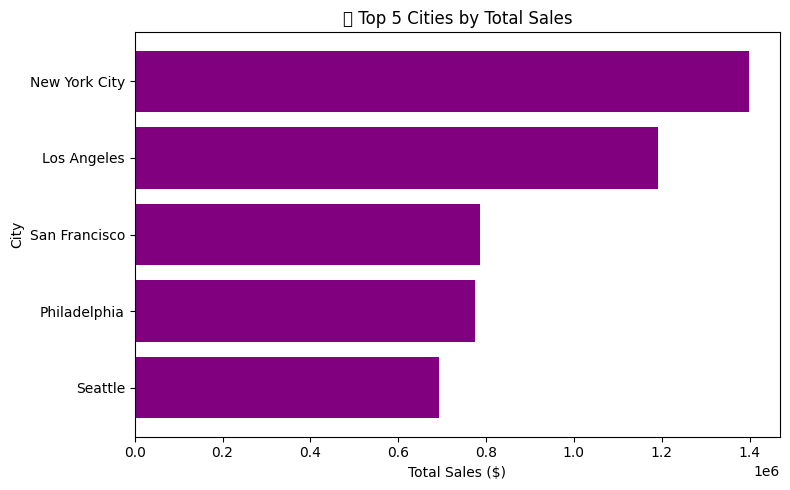

In [31]:
# Plot
plt.figure(figsize=(8, 5))
plt.barh(df["city"][::-1], df["total_sales"][::-1], color="purple")
plt.title("🏙️ Top 5 Cities by Total Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 10
Top 5 Cities by Total Sales

New York City dominates with over $1.39M in sales — clearly the largest revenue-generating city in this dataset.

Los Angeles follows closely with $1.19M, while San Francisco, Philadelphia, and Seattle round out the top 5 — all bringing in over $690K+ each.

These five cities together contribute a massive chunk of total sales, highlighting major urban market strength.

🧠 Business implications:

These cities are ideal targets for:

Premium delivery options (e.g. Same Day)

High-volume promotions or loyalty programs

Localized pricing/discount testing

Further drilling into customer or product behavior by city could uncover even more targeted strategies.

✅ Business Question 11

❓ What are the top-performing sub-categories by total sales?

In [ ]:
#SQL Query
"""

SELECT 
    p.sub_category,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.sub_category
ORDER BY total_sales DESC;


"""

In [32]:
conn = get_db_connection()

query = """
SELECT 
    p.sub_category,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.sub_category
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

In [33]:
df

,sub_category,total_sales
0,Phones,354277.77
1,Chairs,325069.91
2,Storage,220458.34
3,Binders,207410.30
4,Tables,202810.63
5,Machines,194442.87
6,Accessories,189766.41
7,Copiers,146248.09
8,Bookcases,126734.84
9,Appliances,106629.26


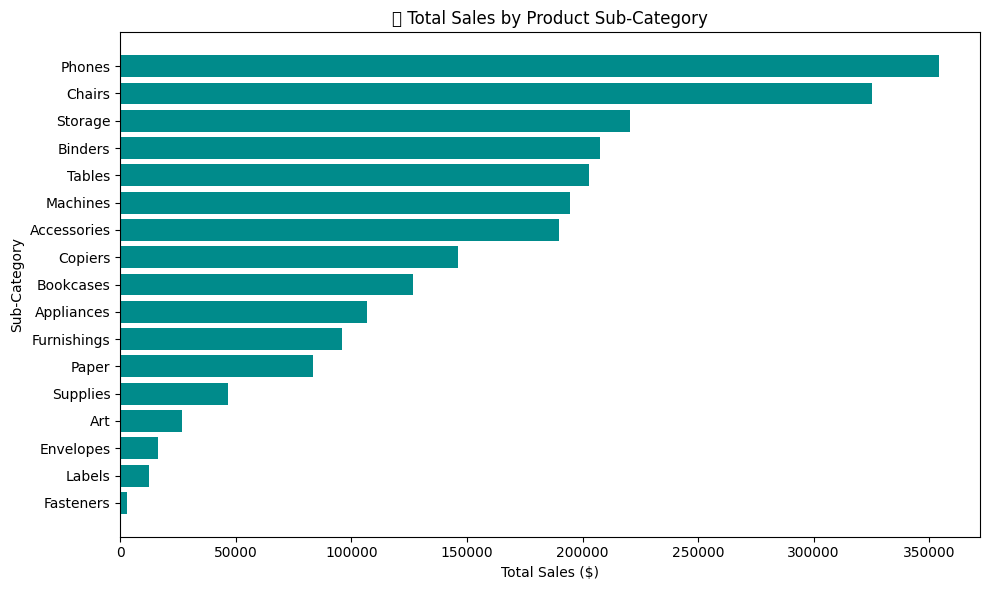

In [34]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["sub_category"][::-1], df["total_sales"][::-1], color="darkcyan")
plt.title("🔍 Total Sales by Product Sub-Category")
plt.xlabel("Total Sales ($)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 11
Top-Performing Sub-Categories by Sales

Phones lead all sub-categories with $354K+ in total revenue — likely driven by high-ticket items and consistent business demand.

Chairs, Storage, Binders, and Tables round out the top 5 — all strong sellers, especially in office and corporate contexts.

Machines, Accessories, and Copiers also show solid performance, signaling steady demand for office tech.

🧠 On the lower end:

Fasteners, Labels, Envelopes, and Art supplies contribute far less — all under $30K, which might indicate:

Low unit prices

Low purchase frequency

Potential bundling or discontinuation candidates

📈 What this tells us:

There’s a clear 80/20 dynamic — a handful of sub-categories contribute the bulk of sales.

Use this for:

Stocking & supply chain focus

Promotional prioritization

Margin analysis by sub-category

✅ Business Question 12

❓ Which product categories are most popular by number of orders (not sales)?

In [ ]:
#SQL Query
"""

SELECT 
    p.category,
    COUNT(DISTINCT l.order_id) AS order_count
FROM link_order_customer_product l
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.category
ORDER BY order_count DESC;


"""

In [35]:
conn = get_db_connection()

query = """
SELECT 
    p.category,
    COUNT(DISTINCT l.order_id) AS order_count
FROM link_order_customer_product l
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.category
ORDER BY order_count DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

In [36]:
df

,category,order_count
0,Office Supplies,3676
1,Furniture,1727
2,Technology,1519


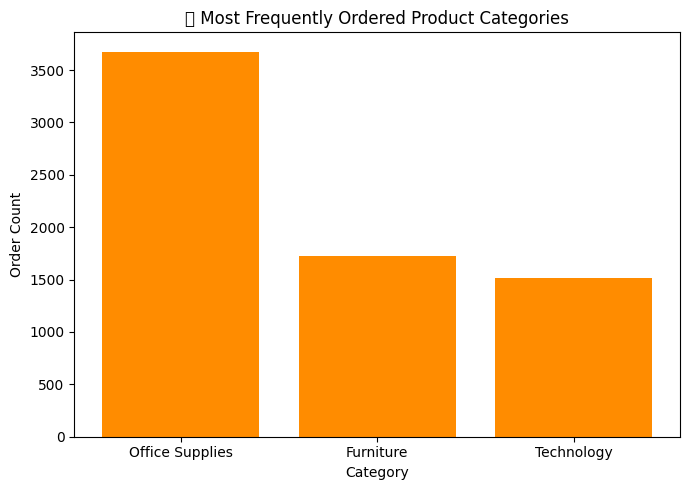

In [37]:
# Plot
plt.figure(figsize=(7, 5))
plt.bar(df["category"], df["order_count"], color="darkorange")
plt.title("📦 Most Frequently Ordered Product Categories")
plt.xlabel("Category")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 12
Most Frequently Ordered Product Categories

Office Supplies dominate in order volume with 3,676 distinct orders, despite ranking third in revenue earlier.

Furniture and Technology follow with 1,727 and 1,519 orders, respectively.

🧠 What this tells us:

Office Supplies are low-ticket, high-frequency items — driving volume and likely contributing to customer retention.

Technology, while the highest in revenue, appears in fewer orders, reinforcing the idea that it’s driven by big-ticket, low-frequency purchases.

Furniture sits in the middle — moderate volume and solid revenue.

This is a classic case of:

Revenue ≠ demand

Use this insight to:

Build loss-leader or bundling strategies

Plan fulfillment resources

Determine which categories drive repeat engagement

✅ Business Question 13

❓ What are the top 5 states by total sales?

In [ ]:
#SQL Query
"""

SELECT 
    c.state,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.state
ORDER BY total_sales DESC
LIMIT 5;


"""

In [38]:
conn = get_db_connection()

query = """
SELECT 
    c.state,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.state
ORDER BY total_sales DESC
LIMIT 5;
"""

df = pd.read_sql(query, conn)
conn.close()

In [39]:
df

,state,total_sales
0,California,3197700.66
1,New York,1783971.22
2,Texas,1504264.80
3,Pennsylvania,872338.89
4,Washington,835754.01


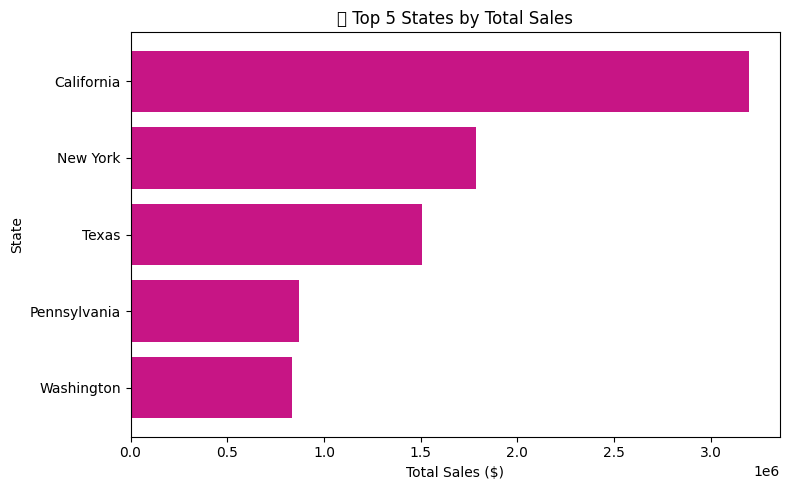

In [40]:
# Plot
plt.figure(figsize=(8, 5))
plt.barh(df["state"][::-1], df["total_sales"][::-1], color="mediumvioletred")
plt.title("🗺️ Top 5 States by Total Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 13
Top 5 States by Total Sales

California is by far the top-performing state, generating over $3.19M in revenue — nearly double that of New York.

New York and Texas follow as strong markets, bringing in $1.78M and $1.50M respectively.

Pennsylvania and Washington round out the top 5, each contributing over $800K.

🧠 What this means:

These five states are major revenue drivers, and likely account for a large portion of national sales.

They represent ideal regions for:

Sales team expansion

Targeted marketing or retention programs

Priority for inventory, shipping hubs, or pricing tests

✅ Business Question 14

❓ What is the average delivery time (in days) across all orders?

In [ ]:
#SQL Query
"""

SELECT 
    ROUND(AVG(ship_date - order_date), 2) AS avg_delivery_days
FROM sat_order;


"""

In [41]:
conn = get_db_connection()

query = """
SELECT 
    ROUND(AVG(ship_date - order_date), 2) AS avg_delivery_days
FROM sat_order;
"""

df = pd.read_sql(query, conn)
conn.close()

In [42]:
df

,avg_delivery_days
0,3.96


✅ Insight for Business Question 14
Average Delivery Time: 3.96 Days

On average, orders are shipped in ~4 days from the date they were placed.

This suggests a reasonably efficient fulfillment cycle, especially for Standard and Second Class shipping, which dominate your shipping modes.

🧠 What this tells us:

A sub-4-day average is a solid benchmark for many B2B and B2C operations.

✅ Business Question 15

❓ How many unique customers does the business have?

In [ ]:
#SQL Query
"""

SELECT 
    COUNT(DISTINCT customer_id) AS total_customers
FROM hub_customer;


"""

In [43]:
conn = get_db_connection()

query = """
SELECT 
    COUNT(DISTINCT customer_id) AS total_customers
FROM hub_customer;
"""

df = pd.read_sql(query, conn)
conn.close()

In [44]:
df

,total_customers
0,793


✅ Insight for Business Question 15
Total Unique Customers: 793

The business has served 793 distinct customers, indicating a moderately broad and diverse customer base.

This number gives us a foundation for:

Lifetime Value (LTV) calculations

Repeat purchase behavior

Churn rate analysis over time

🧠 What this tells us:

With nearly 800 customers, there’s plenty of room for retention strategies, segmentation, and personalized marketing.

✅ Business Question 16

❓ What is the total number of orders placed?

In [ ]:
#SQL Query
"""

SELECT 
    COUNT(DISTINCT order_id) AS total_orders
FROM hub_order;


"""

In [45]:
conn = get_db_connection()

query = """
SELECT 
    COUNT(DISTINCT order_id) AS total_orders
FROM hub_order;
"""

df = pd.read_sql(query, conn)
conn.close()

In [46]:
df

,total_orders
0,4922


✅ Insight for Business Question 16
Total Orders Placed: 4,922

The business processed 4,922 unique orders, showcasing strong operational throughput and steady customer activity.

This volume aligns well with earlier metrics like:

793 unique customers → avg ~6.2 orders per customer

$2.26M+ total revenue → avg order value $459.48

🧠 What this tells us:

The business has a healthy transaction count, indicating frequent purchases — especially considering many products are B2B or mid-ticket.

With nearly 5,000 orders in the system, there’s plenty of opportunity for:

Repeat behavior analysis

RFM (Recency, Frequency, Monetary) scoring

Fulfillment optimization

✅ Business Question 17

❓ What is the total number of products sold (line items)?

In [ ]:
#SQL Query
"""

SELECT 
    COUNT(*) AS total_order_items
FROM sat_orderitem;


"""

In [47]:
conn = get_db_connection()

query = """
SELECT 
    COUNT(*) AS total_order_items
FROM sat_orderitem;
"""

df = pd.read_sql(query, conn)
conn.close()

In [48]:
df

,total_order_items
0,9800


✅ Insight for Business Question 17
Total Products Sold (Line Items): 9,800

Across all orders, the business has sold a total of 9,800 individual product line items.

That’s an average of ~2 products per order (9,800 items / 4,922 orders).

🧠 What this tells us:

Most customers purchase multiple items per order, which aligns with a mid-size B2B sales model (e.g., offices restocking multiple supplies at once).

This metric is key for:

Inventory and logistics planning

Warehouse picking and packaging strategy

Estimating SKU turnover and workload for fulfillment teams

Pairing this with product category and volume can help you prioritize storage space, delivery optimization, and even predict backorders.

✅ Business Question 18

❓ What is the most commonly purchased product (by count, not sales)?

In [ ]:
#SQL Query
"""

SELECT 
    p.product_name,
    COUNT(*) AS times_purchased
FROM link_order_customer_product l
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.product_name
ORDER BY times_purchased DESC
LIMIT 10;


"""

In [49]:
conn = get_db_connection()

query = """
SELECT 
    p.product_name,
    COUNT(*) AS times_purchased
FROM link_order_customer_product l
JOIN sat_product p ON l.product_id = p.product_id
GROUP BY p.product_name
ORDER BY times_purchased DESC
LIMIT 10;
"""

df = pd.read_sql(query, conn)
conn.close()

In [50]:
df

,product_name,times_purchased
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Xerox 1908,18
5,LogitechÂ P710e Mobile Speakerphone,18
6,Staples in misc. colors,18
7,Xerox 1881,18
8,ImationÂ 16GB Mini TravelDrive USB 2.0Â Flash ...,18
9,Staple remover,18


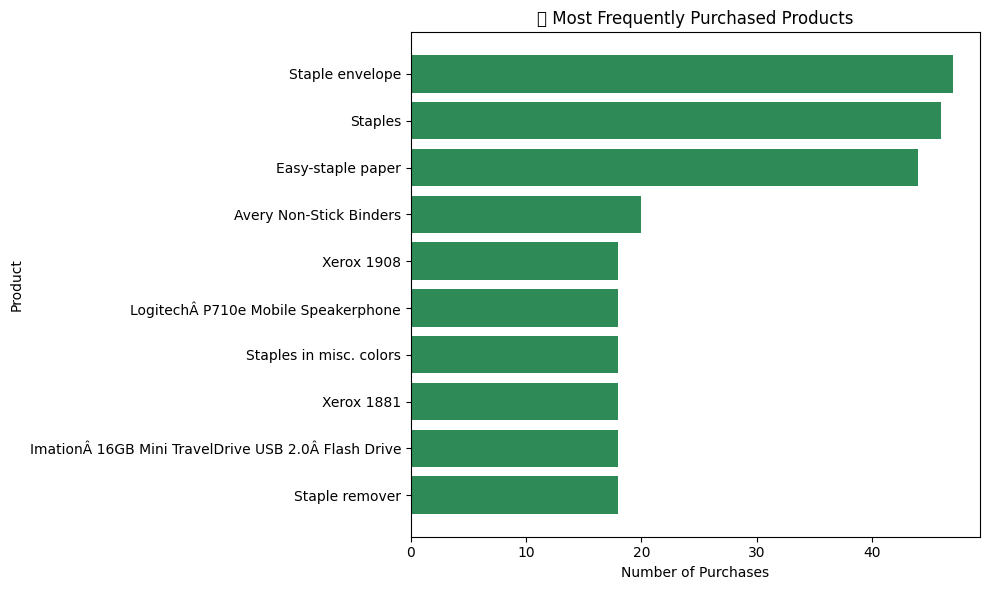

In [51]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["product_name"][::-1], df["times_purchased"][::-1], color="seagreen")
plt.title("🛒 Most Frequently Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 18
Most Frequently Purchased Products (By Count, Not Sales)

The top 3 most frequently purchased products are all low-cost, high-demand office staples:

Staple envelope (47 purchases)

Staples (46)

Easy-staple paper (44)

These products likely generate low revenue per unit, but they move quickly and consistently — ideal for driving:

Repeat purchases

Bundling strategies

Inventory stocking decisions

🧠 What this means:

These are everyday essentials — classic “loss leaders” or volume boosters.

The list is dominated by utility products (binders, USB drives, Xerox items), showing your customer base values practicality.

Unlike high-revenue items like copiers and conference systems, these products keep customers coming back.

✅ Business Question 19

❓ What is the average number of products per order?

In [ ]:
#SQL Query
"""

SELECT 
    ROUND(AVG(product_count), 2) AS avg_products_per_order
FROM (
    SELECT 
        order_id,
        COUNT(*) AS product_count
    FROM link_order_customer_product
    GROUP BY order_id
) AS sub;


"""

In [52]:
conn = get_db_connection()

query = """
SELECT 
    ROUND(AVG(product_count), 2) AS avg_products_per_order
FROM (
    SELECT 
        order_id,
        COUNT(*) AS product_count
    FROM link_order_customer_product
    GROUP BY order_id
) AS sub;
"""

df = pd.read_sql(query, conn)
conn.close()

In [53]:
df

,avg_products_per_order
0,1.99


✅ Insight for Business Question 19
Average Products per Order: 1.99

On average, customers purchase ~2 products per order.

This suggests:

A majority of orders are simple, low-complexity transactions

There’s likely room to increase basket size through:

Product recommendations

Bundles (e.g., “Buy 2, Save 10%”)

Minimum order incentives (“Free shipping on 3+ items”)

🧠 Why it matters:

This is a core e-commerce & retail metric — useful for:

Predicting fulfillment workload

Estimating order revenue when paired with AOV

Optimizing website/product layout

✅ Business Question 20

❓ How much revenue is generated by each customer segment per region?

In [ ]:
#SQL Query
"""

SELECT 
    ROUND(AVG(product_count), 2) AS avg_products_per_order
FROM (
    SELECT 
        order_id,
        COUNT(*) AS product_count
    FROM link_order_customer_product
    GROUP BY order_id
) AS sub;


"""

In [54]:
conn = get_db_connection()
query = """
SELECT 
    c.region,
    c.segment,
    ROUND(SUM(s.sales), 2) AS total_sales
FROM sat_orderitem s
JOIN link_order_customer_product l ON s.link_id = l.link_id
JOIN sat_customer c ON l.customer_id = c.customer_id
GROUP BY c.region, c.segment
ORDER BY c.region, total_sales DESC;
"""
df = pd.read_sql(query, conn)
conn.close()

In [55]:
# Pivot to matrix format
pivot = df.pivot(index="region", columns="segment", values="total_sales").fillna(0)
pivot

segment,Consumer,Corporate,Home Office
region,,,
Central,1911137.74,1093358.17,736085.59
East,2180138.17,1407871.17,795068.19
South,1385351.54,795320.40,449029.03
West,2682029.80,1542767.93,921424.44


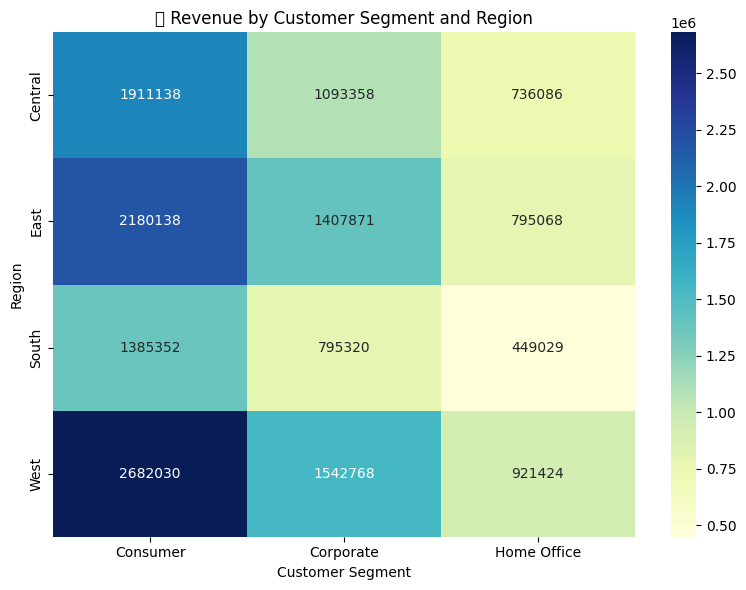

In [56]:
import seaborn as sns

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📊 Revenue by Customer Segment and Region")
plt.ylabel("Region")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()

✅ Insight for Business Question 20
Revenue Breakdown by Region and Customer Segment

Region	Top Segment	Highest Value
West	Consumer	$2.68M 🔥
East	Consumer	$2.18M
Central	Consumer	$1.91M
South	Consumer	$1.39M

Across all four regions, the Consumer segment is the top revenue driver — indicating that individual or B2C-style customers form the largest chunk of business impact.

Corporate segment performs well in the West and East, contributing over $1.5M and $1.4M respectively.

Home Office, while the smallest segment, still contributes between $450K and $920K, showing consistent but lower-value engagement.

🧠 What this tells us:

The West region dominates across all segments — particularly Consumers, with nearly $2.7M in sales alone.

The East shows a strong Corporate presence, while South and Central are more balanced but lower in total.

This insight is ideal for:

Region-segment marketing strategy

Sales team focus by customer type

Identifying cross-sell and upsell opportunities in low-performing segment/region combos